In [1]:
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.scheduler.utils import (Sky_area_generator, Footprints)
from rubin_sim.scheduler.modelObservatory import Model_observatory
from rolling_all_sky import make_rolling_footprints

In [2]:
nside = 32
nslice=2
scale = 0.9
sm = Sky_area_generator(nside=nside)

In [3]:

repeat_night_weight = None

observatory = Model_observatory(nside=nside)
conditions = observatory.return_conditions()



/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_over(newcm(1.0))
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  newcm.set_under(bgcolor)
/Users/yoachim/anaconda3/envs/testenv/lib/python3.9/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the 

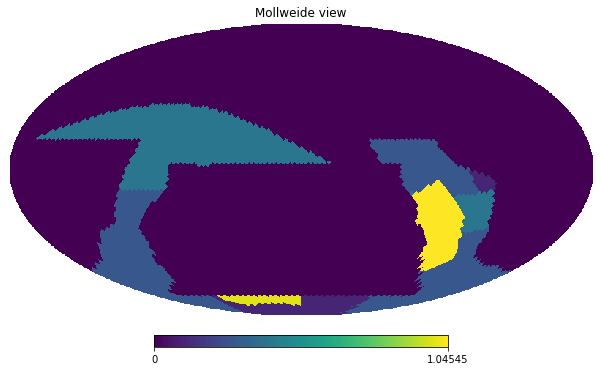

In [4]:

sm.set_maps()
final_tot, footprints_hp = sm.return_maps()
# Set the wfd, aka rolling, pixels
wfd_footprint = sm.maps['dustfree']
wfd_indx = np.where(wfd_footprint > 0)[0]

normval = footprints_hp['r'][wfd_indx].min()
for key in footprints_hp:
    footprints_hp[key] = footprints_hp[key]/normval

fp_non_wfd, rolling_footprints = make_rolling_footprints(fp_hp=footprints_hp, mjd_start=conditions.mjd_start,
                                     sun_RA_start=conditions.sun_RA_start, nslice=nslice, scale=scale,
                                     nside=nside, wfd_indx=wfd_indx)

hp.mollview(fp_non_wfd.footprints[2])

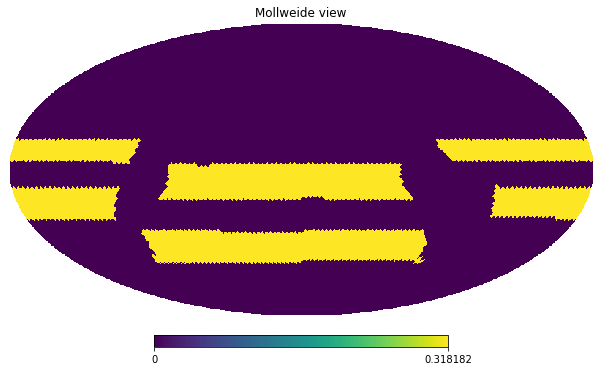

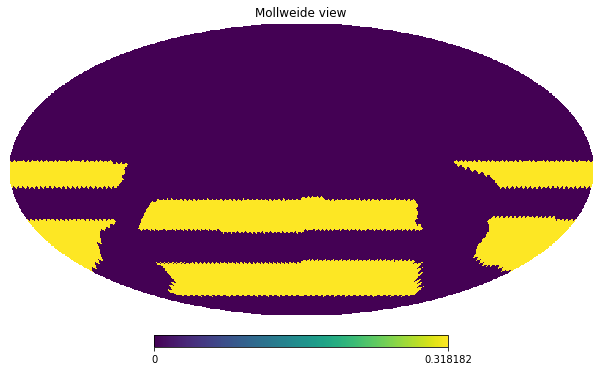

In [5]:
hp.mollview(rolling_footprints[0].footprints[0])
hp.mollview(rolling_footprints[1].footprints[0])


In [6]:
# now to take the bulge, split it in half, then move it from the constant to the rolling footprints
bulge_indx = np.where(sm.maps['gal'] == 1)[0]
bulge_n_indx = bulge_indx[0:int(np.size(bulge_indx)/2)]
bulge_s_indx = bulge_indx[int(np.size(bulge_indx)/2):]
for i in np.arange(6):
    rolling_footprints[0].footprints[i][bulge_n_indx] = fp_non_wfd.footprints[i][bulge_s_indx] + 0
    fp_non_wfd.footprints[i][bulge_s_indx] = 0

    rolling_footprints[1].footprints[i][bulge_s_indx] = fp_non_wfd.footprints[i][bulge_n_indx] + 0
    fp_non_wfd.footprints[i][bulge_n_indx] = 0

# Now take the extinction area, split in half, and move to the rolling footprints
gal_indx = np.where((fp_non_wfd.footprints[3] > 0) & (sm.dec < 3) & (sm.dec > -70) & (sm.maps['gal'] != 1))[0]
gal_n_indx = gal_indx[0:int(np.size(gal_indx)/2)]
gal_s_indx = gal_indx[int(np.size(gal_indx)/2):]
for i in np.arange(6):
    rolling_footprints[0].footprints[i][gal_n_indx] = fp_non_wfd.footprints[i][gal_n_indx] + 0
    fp_non_wfd.footprints[i][gal_n_indx] = 0

    rolling_footprints[1].footprints[i][gal_s_indx] = fp_non_wfd.footprints[i][gal_s_indx] + 0
    fp_non_wfd.footprints[i][gal_s_indx] = 0

footprints = Footprints([fp_non_wfd] + rolling_footprints)

In [7]:
fp_non_wfd.footprints[3]

array([0.        , 0.        , 0.        , ..., 0.10782241, 0.10782241,
       0.10782241])

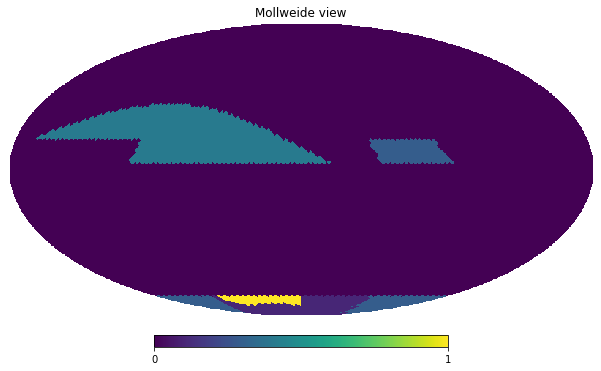

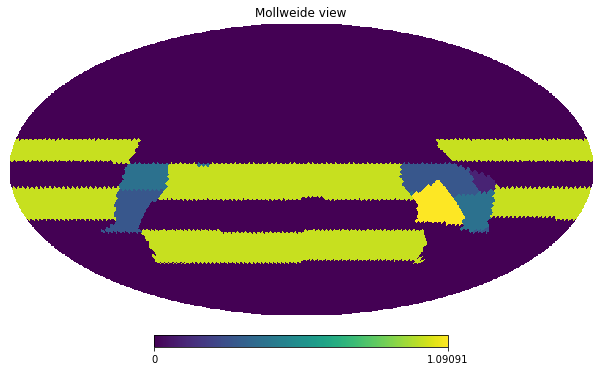

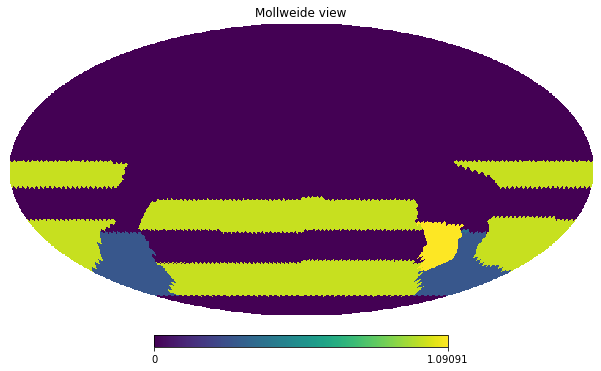

In [8]:
hp.mollview(footprints.footprint_list[0].footprints[3])
hp.mollview(footprints.footprint_list[1].footprints[3])
hp.mollview(footprints.footprint_list[2].footprints[3])

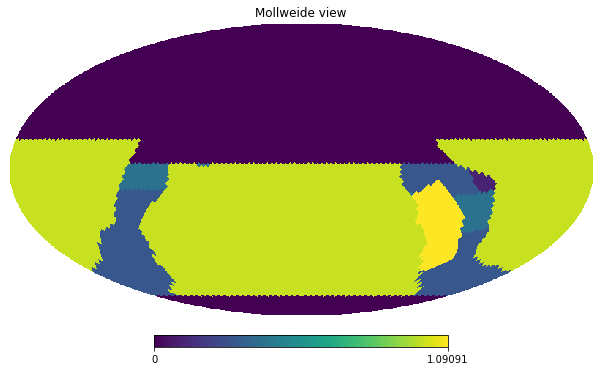

In [9]:
hp.mollview(footprints.footprint_list[1].footprints[3] + footprints.footprint_list[2].footprints[3])